In [1]:
# Import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='F1', ylabel='F2'>

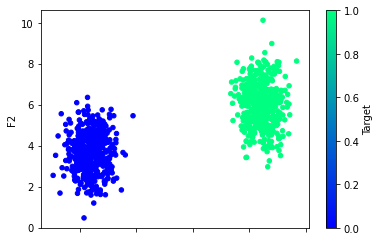

In [2]:
# Generate random dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Create DataFrame with random data
df = pd.DataFrame(X, columns=["F1", "F2"])
df["Target"] = y

# Plot random data
df.plot.scatter(x="F1", y="F2", c="Target", colormap="winter")

In [3]:
# Split dataset using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile Sequential model and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit model to training data
fit_model = nn_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 917us/step - loss: 0.3460 - accuracy: 0.9773
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 957us/step - loss: 0.3308 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3073 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 913us/step - loss: 0.3018 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 956us/step - loss: 0.2966 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 913us/step - loss: 0.2915 - accuracy: 1.0000

24/24 [==============================] - 0s 913us/step - loss: 0.0982 - accuracy: 1.0000
Epoch 81/100
24/24 [==============================] - 0s 870us/step - loss: 0.0969 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - ETA: 0s - loss: 0.0913 - accuracy: 1.00 - 0s 913us/step - loss: 0.0955 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 914us/step - loss: 0.0942 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 870us/step - loss: 0.0930 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 826us/step - loss: 0.0917 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 956us/step - loss: 0.0904 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1000us/step - loss: 0.0892 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 913us/step - loss: 0.0880 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] 

<AxesSubplot:>

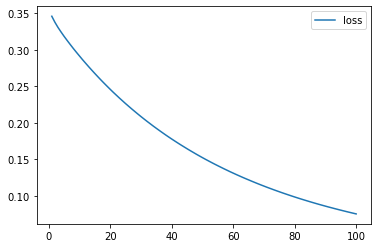

In [11]:
# Create training history DataFrame
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

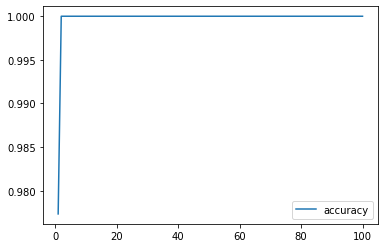

In [12]:
# Accuracy plot
history_df.plot(y="accuracy")

In [13]:
# Evaluate model using test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.3935 - accuracy: 0.8480
Loss: 0.39346349239349365, Accuracy: 0.8479999899864197


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

new_X_scaled = X_scaler.transform(new_X)

(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

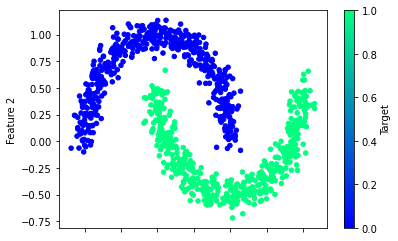

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6094 - accuracy: 0.7160
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.7653
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.7827
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.7973
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8187
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.8267
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8400
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.8520
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3155 - accuracy: 0.8560
Epoch 10/100
24/24 [==============================] - ETA: 0s - loss: 0.3853 - accuracy: 0.75 - 0s 2ms/step -

24/24 [==============================] - 0s 1ms/step - loss: 0.2615 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2613 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2611 - accuracy: 0.8933
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2609 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2607 - accuracy: 0.8933
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2606 - accuracy: 0.8933
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2604 - accuracy: 0.8933
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2603 - accuracy: 0.8933
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2601 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2599 - accuracy: 0.8920
Epoch 92/100


<AxesSubplot:>

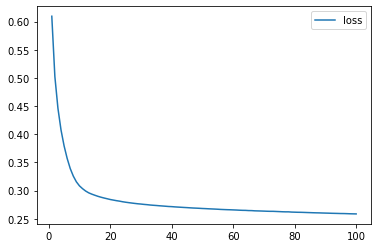

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

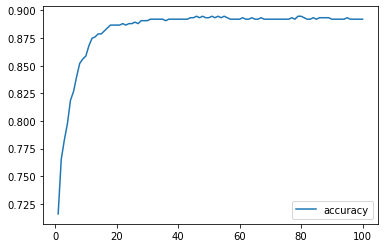

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7004 - accuracy: 0.4200
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6526 - accuracy: 0.5093
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.6893
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5767 - accuracy: 0.8067
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5455 - accuracy: 0.8267
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.8307
Epoch 7/100
24/24 [==============================] - 0s 957us/step - loss: 0.4925 - accuracy: 0.8347
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.8413
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4485 - accuracy: 0.8507
Epoch 10/100
24/24 [==============================] - 0s 1000us/step - loss: 0.4290 - accuracy: 0.8507
Epoc

24/24 [==============================] - 0s 1ms/step - loss: 0.1947 - accuracy: 0.9200
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1934 - accuracy: 0.9200
Epoch 84/100
24/24 [==============================] - 0s 957us/step - loss: 0.1920 - accuracy: 0.9227
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1907 - accuracy: 0.9240
Epoch 86/100
24/24 [==============================] - 0s 958us/step - loss: 0.1893 - accuracy: 0.9240
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1879 - accuracy: 0.9253
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1864 - accuracy: 0.9267
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1849 - accuracy: 0.9267
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1836 - accuracy: 0.9280
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1821 - accuracy: 0.9280
Epoch 92/